<a href="https://colab.research.google.com/github/MakrandDhanokar/CDAC-DAI/blob/main/DL_day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
####GLOBAL VARIABLE####

RANDOM_STATE = 24
np.random.RandomState(seed= RANDOM_STATE)

N_SAMPLE = 1000
NOISE = 0.2
ALPHA =0.1
TEST_SIZE = 0.2
EPOCHS = 200

#Set the plotting parameters
params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (15, 4),
    'axes.labelsize': 'medium',
    'axes.titlesize':'large',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    # 'text.usetex': True,
    # 'text.latex.unicode': True
}

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
X,y = datasets.make_moons(n_samples=N_SAMPLE,
                          noise=NOISE,
                          shuffle=True,
                          random_state=RANDOM_STATE)
X.shape, y.shape

((1000, 2), (1000,))

In [4]:
# EDA
# 1.plot the data
# 2. Print min, max, averages of this datasets


In [5]:
data_df = pd.DataFrame(X, columns=['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<Axes: xlabel='A', ylabel='B'>

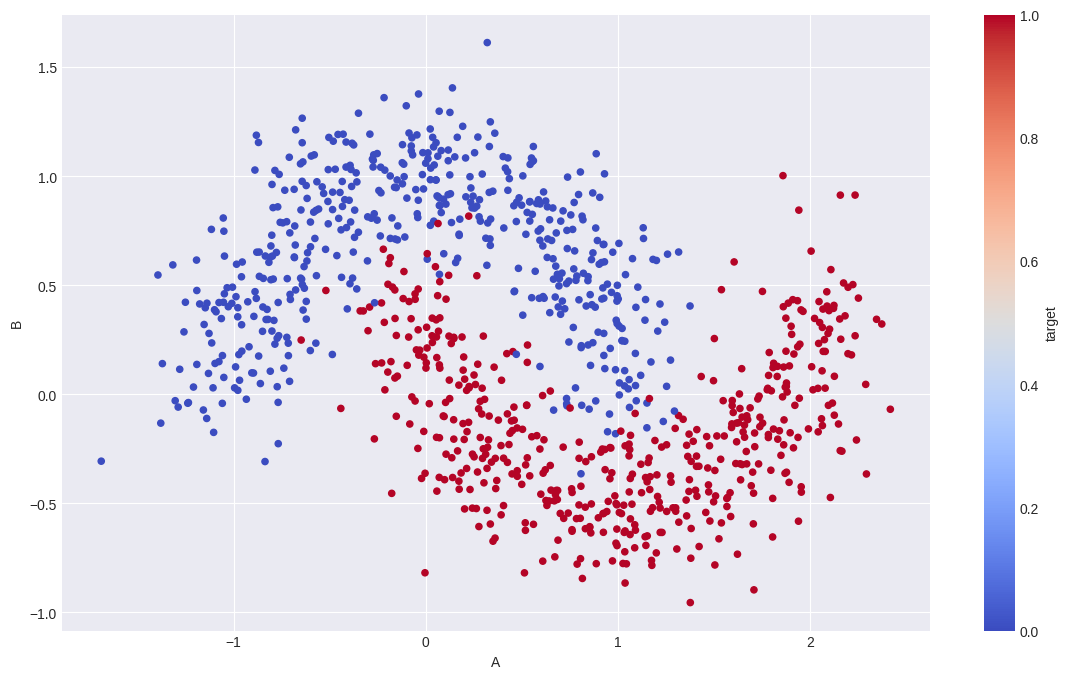

In [6]:
data_df.plot.scatter(x='A', y='B', c='target', cmap=CMAP,figsize=(14,8))

In [7]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [8]:
#predict function
def predict(row, weight):
  z = weight[0]
  for i in range(len(row) - 1):
    z += weight[i+1] * row[i]
  return 1.0 if z >= 0.0 else 0.0

In [9]:
#Testing above function
weights = np.array([0.1, 2.0, 1.0])
predict(data_df.loc[0].values, weights)

1.0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [11]:
#Doing train test split manually
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]
display(data_train.shape)
type(data_train)

(900, 3)

numpy.ndarray

In [12]:
#rng = Random Number Generator
rng  =np.random.default_rng(seed=RANDOM_STATE)
weights = rng.random(data_train.shape[1])
weights

array([0.33026884, 0.40517732, 0.57473782])

In [13]:

def train_weights(train,alpha,n_epochs):
  errors =[]
  weights = rng.random(data_train.shape[1])  #randomly generated weights
  m = train.shape[0]  #no of samples

  for epochs in range(n_epochs):
    sum_error = 0.0
    for row in train:
      prediction = predict(row, weights)
      dz = prediction - row[-1]
      sum_error += (prediction - row[-1]) **2
      weights[0] += -alpha * dz / m

      for i in range(len(row) - 1):
        weights[i+1] += -alpha * dz/m * row[i]
    errors.append(sum_error/m)
  return errors, weights

In [14]:
errors ,weights = train_weights(data_train, ALPHA, EPOCHS)

In [15]:
weights

array([-4.46771743e-05,  2.37064990e-04, -4.07450311e-04])

In [16]:
len(errors)

200

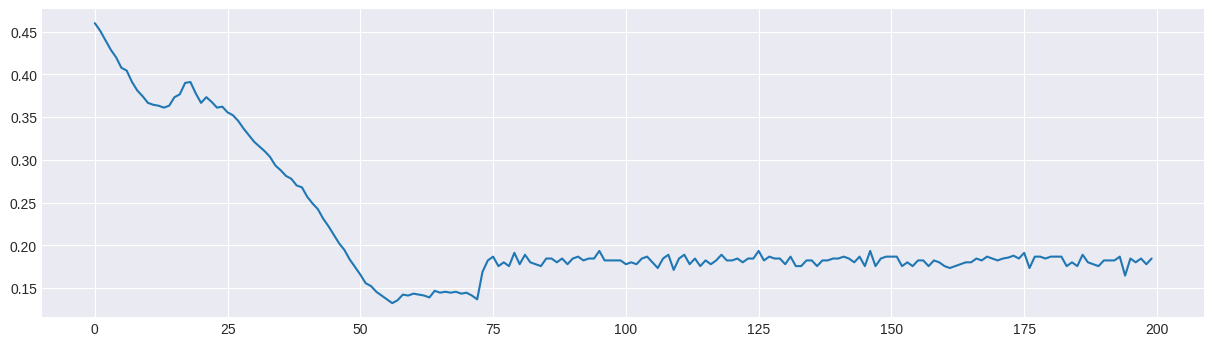

In [17]:
fig, ax = plt.subplots()
ax.plot(errors)

In [18]:
def fn_plot_decision_boundary(weights,X):

  fig, ax = plt.subplots(figsize=(8,5))
  dm=0.01
#min and max alog two axis
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()

#generate a meshgrid
  xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                       np.arange(y_min, y_max, dm))

  XX = np.c_[xx.ravel(), yy.ravel()]

  XX = np.hstack([XX,np.ones((XX.shape[0],1))])

  y_pred = []

  for row in XX:
    y_P = predict(row, weights)
    y_pred.append(y_P)
  Z = np.array(y_pred).reshape(xx.shape)


  ax.contourf(xx, yy, Z, cmap=CMAP)
  ax.scatter(X[:, 0], X[:, 1], c=X[:,2],edgecolors = 'k', cmap=CMAP)

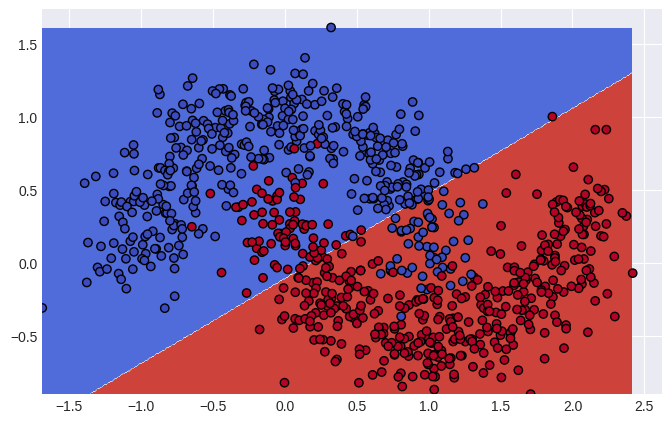

In [19]:
fn_plot_decision_boundary(weights,data_train)

**1. EDA**

**2.Attach sigmoid**

**3.accuracy's confusion matrix**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, ConfusionMatrixDisplay


####GLOBAL VARIABLE####

RANDOM_STATE = 24
np.random.RandomState(seed= RANDOM_STATE)

N_SAMPLE = 1000
NOISE = 0.2
ALPHA =0.1
TEST_SIZE = 0.2
EPOCHS = 4000

#Set the plotting parameters
params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (15, 4),
    'axes.labelsize': 'medium',
    'axes.titlesize':'large',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    # 'text.usetex': True,
    # 'text.latex.unicode': True
}

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


In [21]:
X,y = datasets.make_moons(n_samples=N_SAMPLE,
                          noise=NOISE,
                          shuffle=True,
                          random_state=RANDOM_STATE)
X.shape, y.shape

data_df = pd.DataFrame(X, columns=['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<Axes: xlabel='A', ylabel='B'>

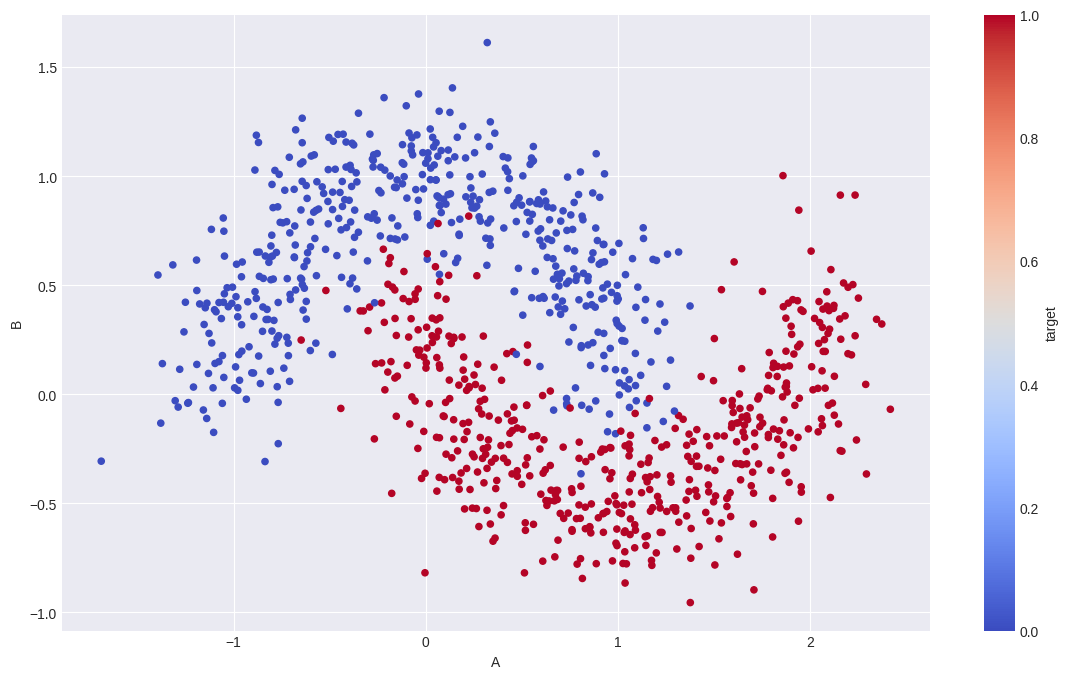

In [22]:
data_df.plot.scatter(x='A', y='B', c='target', cmap=CMAP,figsize=(14,8))

In [23]:
#sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

#predict function
def predict(row, weight):
  z = weight[0]
  for i in range(len(row) - 1):
    z += weight[i+1] * row[i]
  return sigmoid(z)


In [24]:
#rng = Random Number Generator
rng  =np.random.default_rng(seed=RANDOM_STATE)
weights = rng.random(data_train.shape[1])

In [25]:

def train_weights(train,alpha,n_epochs):
  errors =[]
  weights = rng.random(train.shape[1])  #randomly generated weights
  m = train.shape[0]  #no of samples

  for epochs in range(n_epochs):
    sum_error = 0.0
    for row in train:
      prediction = predict(row, weights)
      dz = prediction - row[-1]
      sum_error += -row[-1]*np.log(prediction)
      weights[0] += -alpha * dz / m

      for i in range(len(row) - 1):
        weights[i+1] += -alpha * dz/m * row[i]
    errors.append(sum_error/m)
  return errors, weights

In [26]:
errors ,weights = train_weights(data_train, ALPHA, EPOCHS)

In [27]:
len(errors)

4000

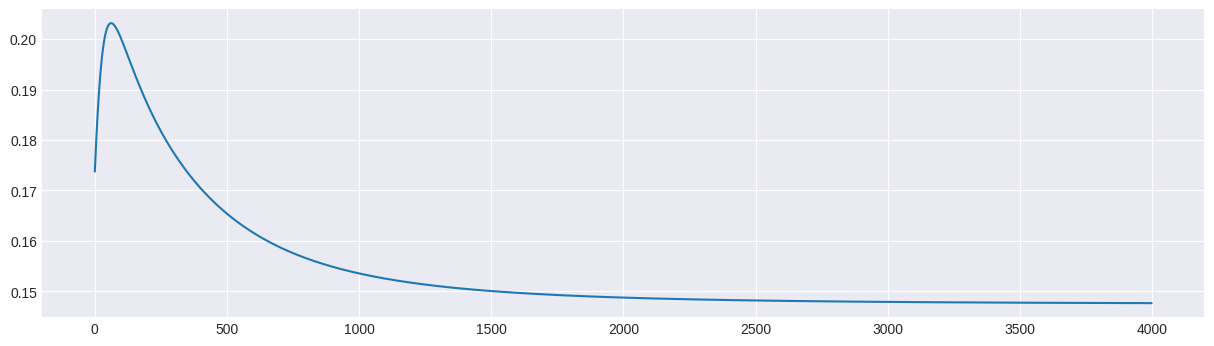

In [28]:
fig, ax = plt.subplots()
ax.plot(errors)
plt.show()

In [29]:
#@@@@@@@@@@ To be deleted
X = data_train
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()


In [30]:
def fn_plot_decision_boundary(weights,X):

  fig, ax = plt.subplots(figsize=(8,5))
  dm=0.001
#min and max alog two axis
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()

#generate a meshgrid
  xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                       np.arange(y_min, y_max, dm))

  XX = np.c_[xx.ravel(), yy.ravel()]

  XX = np.hstack([XX,np.ones((XX.shape[0],1))])

  y_pred = []

  for row in XX:
    a = predict(row, weights)
    y_p = 0
    if a >= 0.5:
        y_p = 1
    y_pred.append(y_p)
  Z = np.array(y_pred).reshape(xx.shape)


  ax.contourf(xx, yy, Z, cmap=CMAP)
  ax.scatter(X[:, 0], X[:, 1], c=X[:,2],edgecolors = 'k', cmap=CMAP)

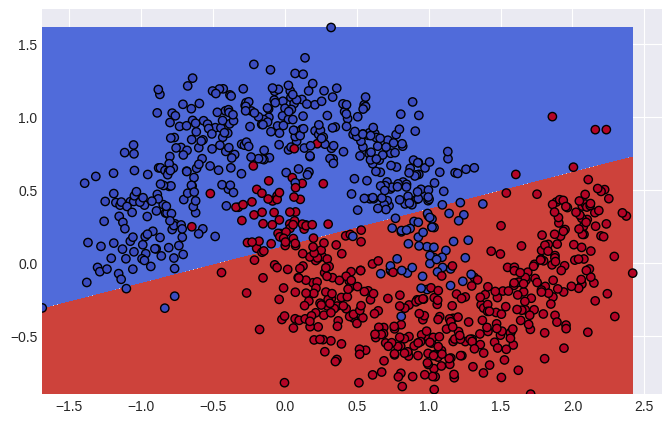

In [31]:
fn_plot_decision_boundary(weights,data_train)

#Accuracies, confusion Matrix



In [32]:
preds =[]
for row in data_train:
  a = predict(row, weights)
  y_pred = 0
  if a >= 0.5:
      y_pred = 1
  preds.append(y_pred)

accuracy_score(data_train[:,-1],preds)

0.8655555555555555

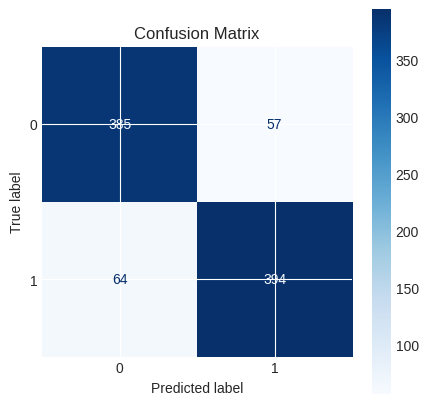

In [33]:
cm = confusion_matrix(data_train[:,-1],preds)
disp = ConfusionMatrixDisplay(cm,
                              display_labels= [0,1])
fig,ax = plt.subplots(figsize=(5,5))
disp.plot(ax = ax, cmap = 'Blues', values_format = 'g')
disp.ax_.set_title('Confusion Matrix')
plt.show()

# DNN
# One Hidden Layer Network

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, ConfusionMatrixDisplay


####GLOBAL VARIABLE####

RANDOM_STATE = 24
np.random.RandomState(seed= RANDOM_STATE)

N_SAMPLE = 1000
NOISE = 0.2
ALPHA =0.1
TEST_SIZE = 0.2
EPOCHS = 4000

#Set the plotting parameters
params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (15, 4),
    'axes.labelsize': 'medium',
    'axes.titlesize':'large',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    # 'text.usetex': True,
    # 'text.latex.unicode': True
}

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


In [35]:
X,y = datasets.make_moons(n_samples=N_SAMPLE,
                          noise=NOISE,
                          shuffle=True,
                          random_state=RANDOM_STATE)
X.shape, y.shape

data_df = pd.DataFrame(X, columns=['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [36]:
#sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

#Activation Function
def fn_actv(z):
    return np.tanh(z)

#Derivative of
def fn_actv_prime(z):
    return 1 - np.tanh(z)**2

#Predict Function
def predict():
    z = 1

    return sigmoid(z)

def fn_calculate_loss():
    pass

In [37]:
fn_actv(np.array([[-1, 0, 1], [-np.inf, 0, np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

split data in train test

In [38]:
features_df = data_df.drop('target', axis=1)
labels = data_df['target']

X_train, X_test, y_train, y_test = train_test_split(features_df,
                                                    labels,
                                                    test_size=TEST_SIZE,
                                                    stratify=labels,
                                                    random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

***MODEL BUILDING***

In [39]:
#rng = Random Number Generator
rng  =np.random.default_rng(seed=RANDOM_STATE)
weights = rng.random(data_train.shape[1])

In [40]:
def build_model(nn_hdim, X_t, y_t, epochs = EPOCHS, alpha = ALPHA):
    '''
    2 - 4 - 1
    input hidden output
    '''
    m, nn_input_dim = X_t.shape
    nn_output_shape = y_t.shape[1]

    W1 = rng.random((nn_input_dim, nn_hdim), dtype= np.float32) / np.sqrt(nn_input_dim)
    W2 = rng.random((nn_hdim, nn_output_shape), dtype= np.float32) / np.sqrt(nn_hdim)


    b1 = np.zeros((1, nn_hdim), dtypes = np.float32)
    b2 = np.zeros((1, nn_output_shape), dtypes = np.float32)

    curr_loss = 0
    loss = []
    epoch = []

    for i in range(n_epochs):
      z1 = X_t.dot(W1) + b1         # Agregation
      a1 = fn_actv(z1)              # Activation

      z2 = a1.dot(W2) + b2          # Aggregation
      a2 = sigmoid(z2)              # Activation

    ### Back Propogation
    dz2 = a2 - y                    # y should be of shape (1, m)
    dW2 = (a1.T).dot(dz2)
    assert (W2.shape == dW2.shape), 'Shape: W2 - {W2.shape} and dW2-{dW2.shape}'
    db2 = np.sum(dz2, axis = 0, keepdims = True)
    assert (b2.shape == b2.shape), 'Shape: b2 - {b2.shape} and db2-{db2.shape}'
    print(W1.shape, W2.shape, b1.shape, b2.shape)
    assert (a1.shape == da1.shape), 'Shape: a1 - {a1.shape} and da2-{da1.shape}'

    #Layer 1
    dz1 = da1 * fn_actv_prime(z1)
    assert(z1.shape == dz1.shape), 'Shape: z1 - {z1.shape} and dz1-{dz1.shape}'
    dW1 = np.dot(X_t.T, dz1)
    assert (W1.shape == dW1.shape), 'Shape: W1 - {W1.shape} and dW1-{dW1.shape}'
    db1 = np.sum(dz1, axis=0, keepdims=True)
    assert (b1.shape == db1.shape), 'Shape: b1 - {b1.shape} and db1-{db1.shape}'

    ### Gradient Update
    W1 += -alpha * dW1/m
    W2 += -alpha * dW2/m
    b1 += -alpha * db1/m
    b2 += -alpha * db2/m

    model = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}

    if i%100 == 0:
        curr_loss = fn_calculate_loss(model, Xt, y_t)
        loss.append(curr_loss)
        epoch.append(i)

    if i%1000 == 0:
        print(f'Loss after: (i:>5d) epochs: {curr_loss:0.5f}')

        # curr_loss = fn_calculate_loss(model, Xt, y_t)
        # loss.append(curr_loss)
        # epoch.append(i)
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss

    return W1, W2, b1, b2

In [42]:
y_train = y_train.values.reshape(-1, 1)
y_train.shape

(800, 1)

In [43]:
build_model(4, X_train, y_train)

(2, 4) (4, 1)
